<a href="https://colab.research.google.com/github/HarshiniTayi23/Projects/blob/main/Hybrid_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance pandas numpy matplotlib seaborn statsmodels

[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for AAPL
Data shape: (756, 6)
Dataset Shape: (756, 6)

Columns: [('Adj Close', 'AAPL'), ('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')]

Missing Values:
Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64

Summary Statistics:
Price    Adj Close       Close        High         Low        Open  \
Ticker        AAPL        AAPL        AAPL        AAPL        AAPL   
count   756.000000  756.000000  756.000000  756.000000  756.000000   
mean    127.940987  130.311812  131.892775  128.614983  130.231998   
std      30.494848   30.566496   30.841435   30.287325   30.596429   
min      54.509766   56.092499   57.125000   53.152500   57.020000   
25%     112.981401  115.739374  117.275000  114.129997  115.924374   
50%     133.331650  135.379997  137.200005  133.750000  135.794998   
75%     148.579063  150.

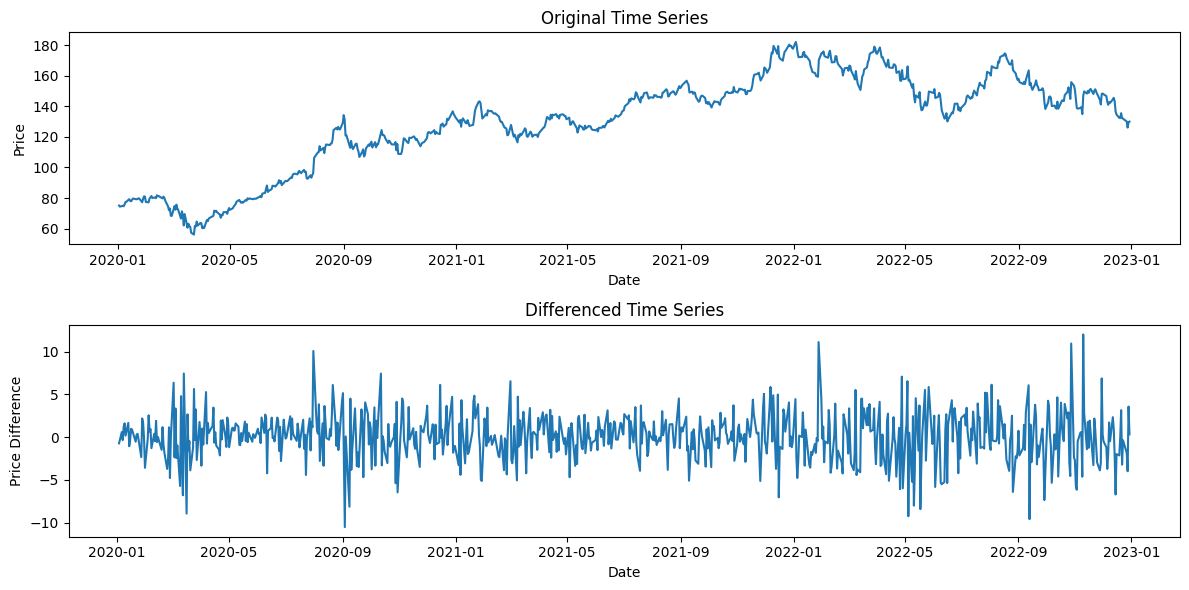


Preprocessing Complete. Cleaned dataset saved to 'preprocessed_aapl_stock.csv'


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Download Apple stock data using yfinance
def download_stock_data(ticker='AAPL', start='2020-01-01', end='2022-12-31'):
    """
    Download stock data using yfinance with updated date range
    """
    try:
        # Download data
        stock_data = yf.download(ticker, start=start, end=end)

        # Verify data was downloaded
        if stock_data.empty:
            raise ValueError(f"No data downloaded for {ticker}")

        print(f"Successfully downloaded data for {ticker}")
        print("Data shape:", stock_data.shape)

        return stock_data

    except Exception as e:
        print(f"Error downloading stock data: {e}")
        return None

# 1. Initial Data Inspection
def initial_data_inspection(df):
    """
    Perform initial data inspection and cleaning
    """
    print("Dataset Shape:", df.shape)

    # Print column names
    print("\nColumns:", list(df.columns))

    # Check for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Summary statistics
    print("\nSummary Statistics:")
    print(df.describe())

    return df

# 2. Handle Missing Values
def handle_missing_values(df):
    """
    Handle missing values in the dataset
    """
    # Fill missing values with forward fill (last known value)
    df_cleaned = df.ffill()

    # If any remaining NaNs, fill with backward fill
    df_cleaned = df_cleaned.bfill()

    return df_cleaned

# 3. Stationarity Test (Augmented Dickey-Fuller)
def stationarity_test(series):
    """
    Perform Augmented Dickey-Fuller test for stationarity
    """
    print(f"\nStationarity Test for Price:")

    # Perform Augmented Dickey-Fuller test
    result = adfuller(series.dropna())

    # Print test results
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

    # Interpretation
    if result[1] <= 0.05:
        print("\nThe series is stationary (reject null hypothesis)")
    else:
        print("\nThe series is non-stationary (fail to reject null hypothesis)")

    return result

# 4. Create Differenced Series
def difference_series(series):
    """
    Create first-order differenced series
    """
    differenced = series.diff().dropna()

    print("\nDifferenced Series Stationarity:")
    stationarity_test(differenced)

    return differenced

# 5. Visualize Original and Differenced Series
def visualize_series(original, differenced):
    """
    Plot original and differenced series
    """
    plt.figure(figsize=(12,6))

    plt.subplot(2,1,1)
    plt.title('Original Time Series')
    plt.plot(original)
    plt.xlabel('Date')
    plt.ylabel('Price')

    plt.subplot(2,1,2)
    plt.title('Differenced Time Series')
    plt.plot(differenced)
    plt.xlabel('Date')
    plt.ylabel('Price Difference')

    plt.tight_layout()
    plt.show()

# Main Preprocessing Workflow
def main_preprocessing(df):
    # 1. Initial Inspection
    df_inspected = initial_data_inspection(df)

    # 2. Handle Missing Values
    df_cleaned = handle_missing_values(df_inspected)

    # Select the Close price column
    close_price = df_cleaned['Close']

    # 3. Stationarity Test
    stationarity_test(close_price)

    # 4. Create Differenced Series
    differenced_series = difference_series(close_price)

    # 5. Visualize
    visualize_series(close_price, differenced_series)

    return df_cleaned

# Main Execution
if __name__ == "__main__":
    # Download stock data
    aapl = download_stock_data()

    if aapl is not None:
        # Preprocess the data
        preprocessed_aapl = main_preprocessing(aapl)

        # Optional: Save the cleaned dataset
        preprocessed_aapl.to_csv('preprocessed_aapl_stock.csv')

        print("\nPreprocessing Complete. Cleaned dataset saved to 'preprocessed_aapl_stock.csv'")

[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for AAPL
Data shape: (756, 6)
Dataset Shape: (756, 6)

Columns: [('Adj Close', 'AAPL'), ('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')]

Missing Values:
Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64

Summary Statistics:
Price    Adj Close       Close        High         Low        Open  \
Ticker        AAPL        AAPL        AAPL        AAPL        AAPL   
count   756.000000  756.000000  756.000000  756.000000  756.000000   
mean    127.940987  130.311812  131.892775  128.614983  130.231998   
std      30.494848   30.566496   30.841435   30.287325   30.596429   
min      54.509766   56.092499   57.125000   53.152500   57.020000   
25%     112.981401  115.739374  117.275000  114.129997  115.924374   
50%     133.331650  135.379997  137.200005  133.750000  135.794998   
75%     148.579063  150.

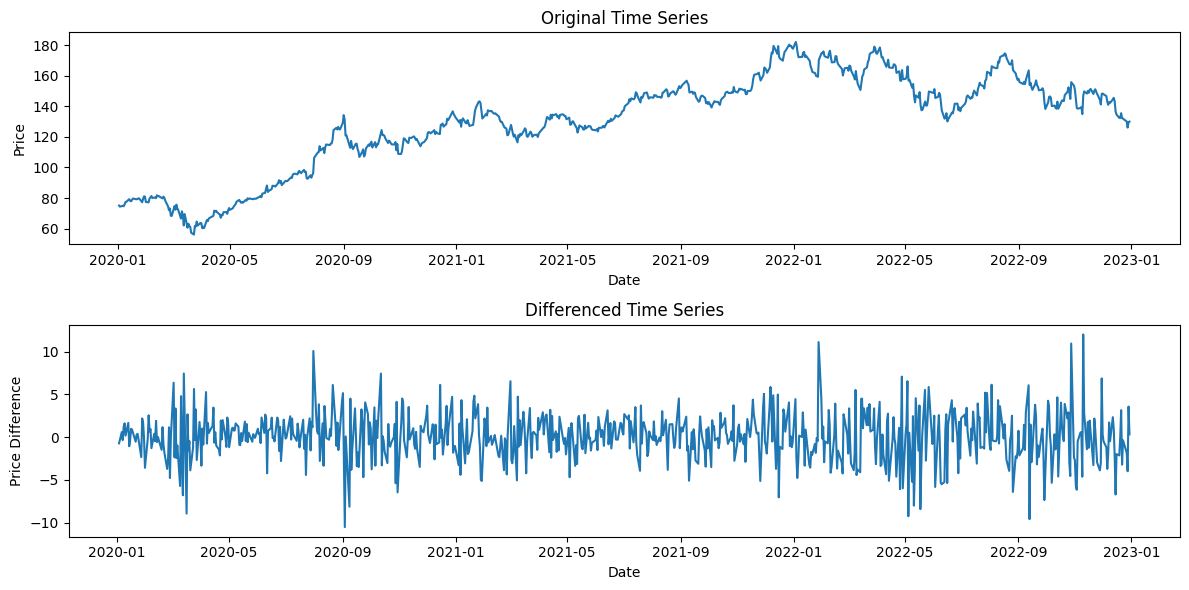

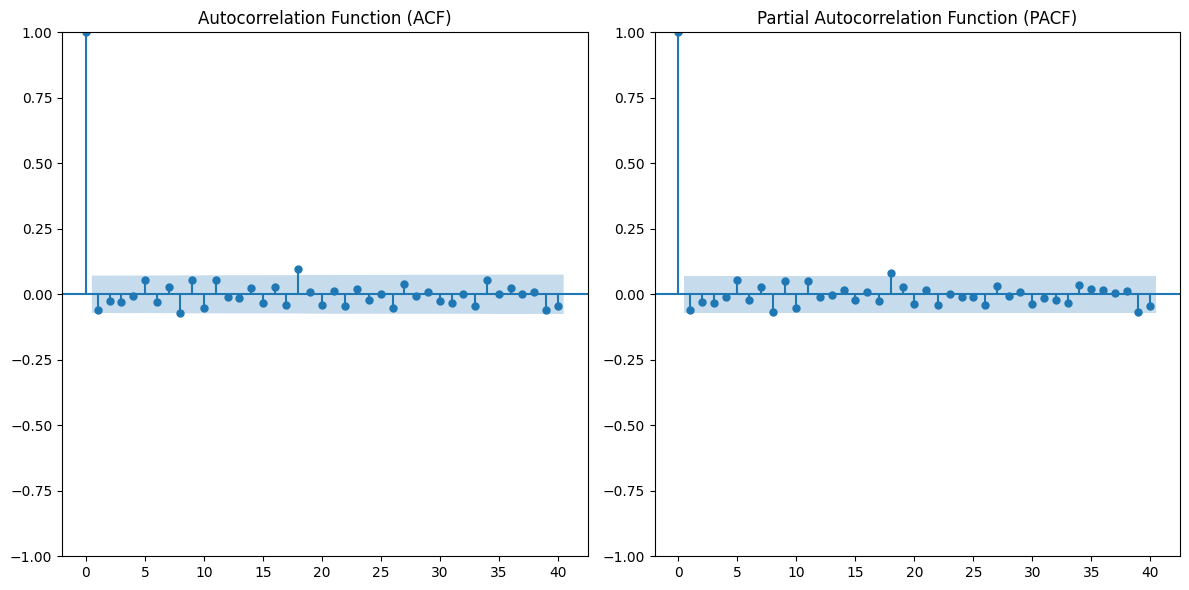


Testing ARIMA order: (1, 1, 1)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      ('Close', 'AAPL')   No. Observations:                  756
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1844.760
Date:                Sun, 01 Dec 2024   AIC                           3695.519
Time:                        15:37:09   BIC                           3709.400
Sample:                             0   HQIC                          3700.866
                                - 756                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3967      0.369      1.076      0.282      -0.326       1.120
ma.L1         -0.4613      0.360     -1.282      0.200      -1.167       0.244
sigma2         7.7587      0.312     24.904      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


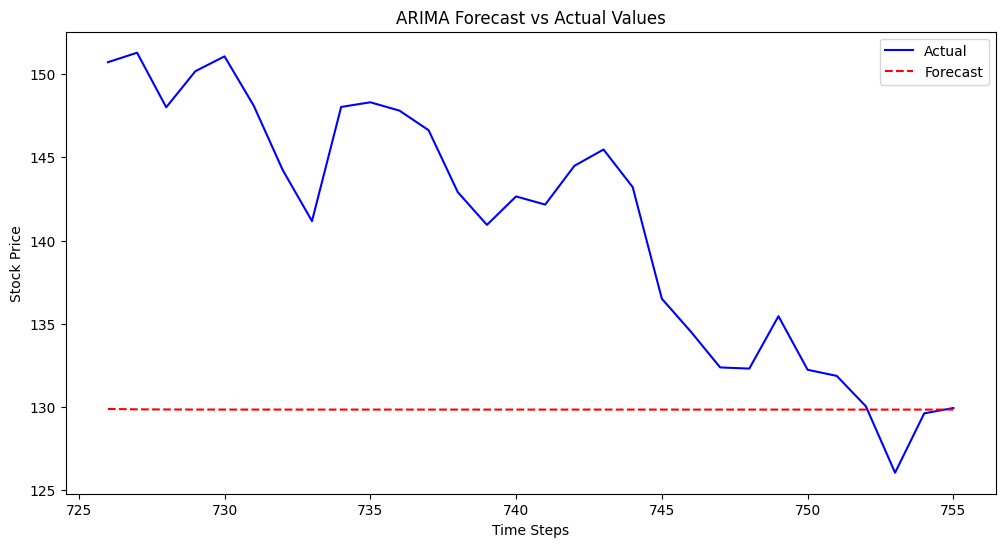


ARIMA Model Performance:
Mean Absolute Error (MAE): 11.3702
Root Mean Square Error (RMSE): 13.4392

Testing ARIMA order: (1, 1, 2)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      ('Close', 'AAPL')   No. Observations:                  756
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1844.752
Date:                Sun, 01 Dec 2024   AIC                           3697.503
Time:                        15:37:10   BIC                           3716.010
Sample:                             0   HQIC                          3704.632
                                - 756                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3173      0.961      0.330      0.741      -1.567       2.201
ma.L1         -0.3809      0.965     -0.395      0.693      -2.272       1.510
ma.L2         -0.0089      0.079     -0.113      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


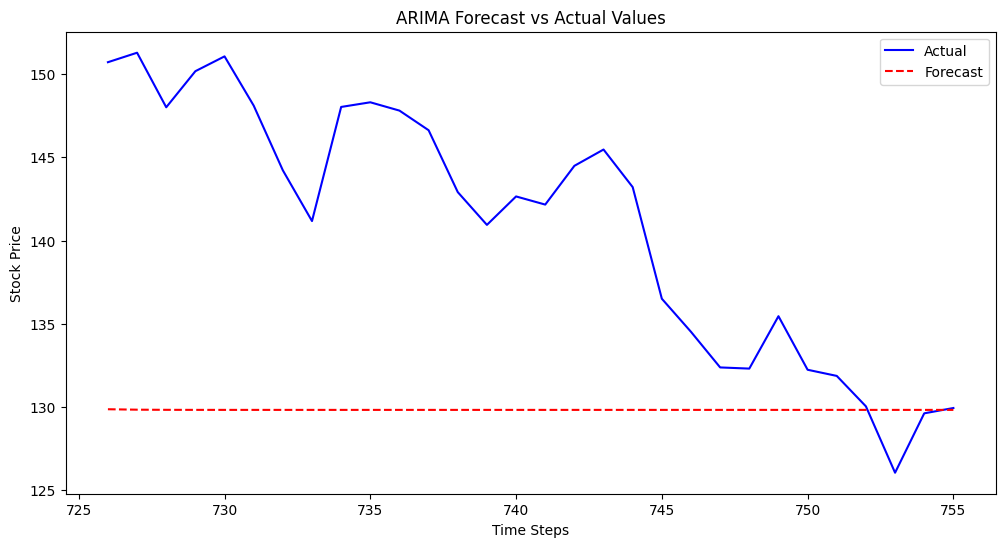


ARIMA Model Performance:
Mean Absolute Error (MAE): 11.3868
Root Mean Square Error (RMSE): 13.4551

Testing ARIMA order: (2, 1, 1)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

                               SARIMAX Results                                
Dep. Variable:      ('Close', 'AAPL')   No. Observations:                  756
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1844.750
Date:                Sun, 01 Dec 2024   AIC                           3697.499
Time:                        15:37:12   BIC                           3716.006
Sample:                             0   HQIC                          3704.628
                                - 756                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3416      0.789      0.433      0.665      -1.205       1.888
ar.L2         -0.0078      0.067     -0.116      0.908      -0.139       0.124
ma.L1         -0.4049      0.792     -0.511      0.6

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


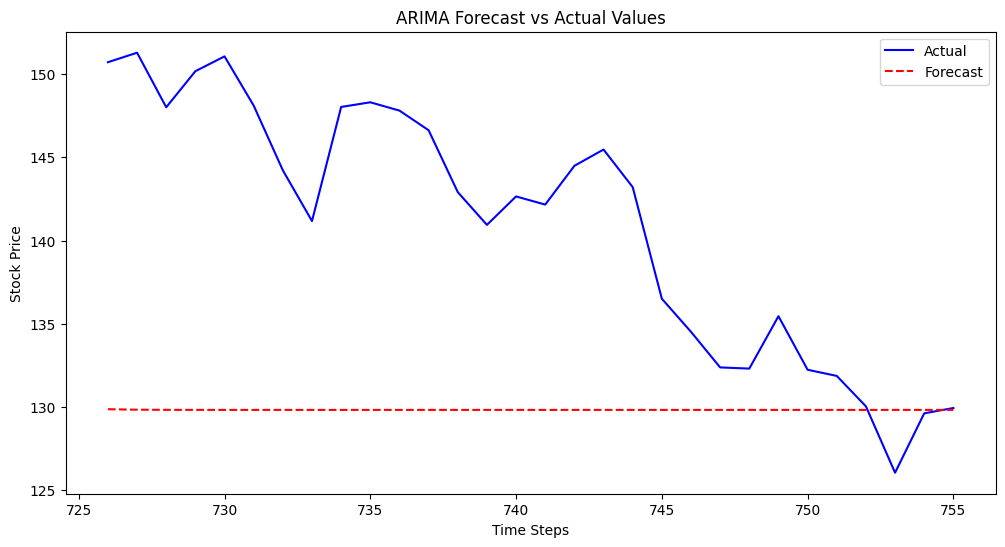


ARIMA Model Performance:
Mean Absolute Error (MAE): 11.3869
Root Mean Square Error (RMSE): 13.4552

Best ARIMA order: (1, 1, 1)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

def plot_acf_pacf(series):
    """
    Plot ACF and PACF to help determine ARIMA parameters

    Parameters:
    - series: Time series data
    """
    plt.figure(figsize=(12,6))

    # ACF Plot
    plt.subplot(1,2,1)
    plot_acf(series, ax=plt.gca(), lags=40)
    plt.title('Autocorrelation Function (ACF)')

    # PACF Plot
    plt.subplot(1,2,2)
    plot_pacf(series, ax=plt.gca(), lags=40)
    plt.title('Partial Autocorrelation Function (PACF)')

    plt.tight_layout()
    plt.show()

def fit_arima_model(series, order=(1,1,1)):
    """
    Fit ARIMA model and perform forecasting

    Parameters:
    - series: Time series data
    - order: (p,d,q) ARIMA parameters

    Returns:
    - Trained ARIMA model
    - Forecast results
    """
    # Fit ARIMA model
    model = ARIMA(series, order=order)
    model_fit = model.fit()

    # Print model summary
    print(model_fit.summary())

    return model_fit

def evaluate_arima_forecast(series, model_fit, test_size=30):
    """
    Evaluate ARIMA model forecasting performance

    Parameters:
    - series: Original time series
    - model_fit: Fitted ARIMA model
    - test_size: Number of steps to forecast and evaluate

    Returns:
    - Forecast results
    - Performance metrics
    """
    # Prepare data
    train = series[:-test_size]
    test = series[-test_size:]

    # Forecast
    forecast = model_fit.forecast(steps=test_size)

    # Calculate performance metrics
    mae = mean_absolute_error(test, forecast)
    rmse = np.sqrt(mean_squared_error(test, forecast))

    # Visualization
    plt.figure(figsize=(12,6))
    plt.plot(range(len(train), len(series)), test, label='Actual', color='blue')
    plt.plot(range(len(train), len(series)), forecast, label='Forecast', color='red', linestyle='--')
    plt.title('ARIMA Forecast vs Actual Values')
    plt.xlabel('Time Steps')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

    # Print performance metrics
    print("\nARIMA Model Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Square Error (RMSE): {rmse:.4f}")

    return forecast, mae, rmse

def main_arima_analysis(close_price):
    """
    Main workflow for ARIMA model analysis

    Parameters:
    - close_price: Closing price time series
    """
    # 1. Plot ACF and PACF to help determine ARIMA parameters
    plot_acf_pacf(close_price.diff().dropna())

    # 2. Fit ARIMA model
    # Common orders to try: (1,1,1), (1,1,2), (2,1,1)
    arima_orders = [(1,1,1), (1,1,2), (2,1,1)]

    best_order = None
    best_rmse = float('inf')

    for order in arima_orders:
        print(f"\nTesting ARIMA order: {order}")
        try:
            # Fit model
            model_fit = fit_arima_model(close_price, order=order)

            # Evaluate forecast
            _, mae, rmse = evaluate_arima_forecast(close_price, model_fit)

            # Track best model
            if rmse < best_rmse:
                best_rmse = rmse
                best_order = order

        except Exception as e:
            print(f"Error with order {order}: {e}")

    print(f"\nBest ARIMA order: {best_order}")

    return best_order

# Example usage in main script
if __name__ == "__main__":
    # Assuming previous preprocessing steps
    aapl = download_stock_data()
    preprocessed_aapl = main_preprocessing(aapl)

    # Select close price
    close_price = preprocessed_aapl['Close', 'AAPL']

    # Perform ARIMA analysis
    best_arima_order = main_arima_analysis(close_price)

[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for AAPL
Data shape: (756, 6)
Dataset Shape: (756, 6)

Columns: [('Adj Close', 'AAPL'), ('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')]

Missing Values:
Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64

Summary Statistics:
Price    Adj Close       Close        High         Low        Open  \
Ticker        AAPL        AAPL        AAPL        AAPL        AAPL   
count   756.000000  756.000000  756.000000  756.000000  756.000000   
mean    127.940987  130.311812  131.892775  128.614983  130.231998   
std      30.494848   30.566496   30.841435   30.287325   30.596429   
min      54.509766   56.092499   57.125000   53.152500   57.020000   
25%     112.981401  115.739374  117.275000  114.129997  115.924374   
50%     133.331650  135.379997  137.200005  133.750000  135.794998   
75%     148.579063  150.

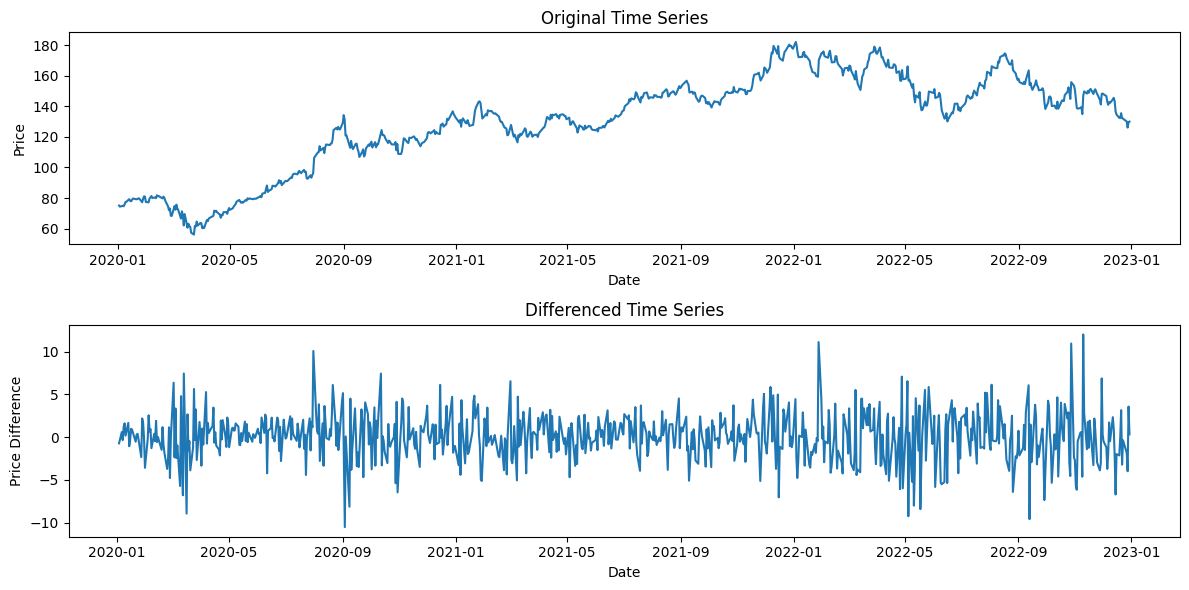

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.2479 - val_loss: 0.0059 - learning_rate: 0.0010
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0207 - val_loss: 0.0061 - learning_rate: 0.0010
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0105 - val_loss: 0.0039 - learning_rate: 0.0010
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0090 - val_loss: 0.0043 - learning_rate: 0.0010
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0093 - val_loss: 0.0037 - learning_rate: 0.0010
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 0.0088 - val_loss: 0.0038 - learning_rate: 0.0010
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0085 - val_loss: 0.0047 - learning_rate: 0.0010
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0077 - val_loss: 0.0034 - learning_rate: 0.0010
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0084 - val_loss: 0.0040 - learning_rate: 0.0010
Epoch 10/100
18/18 ━━━

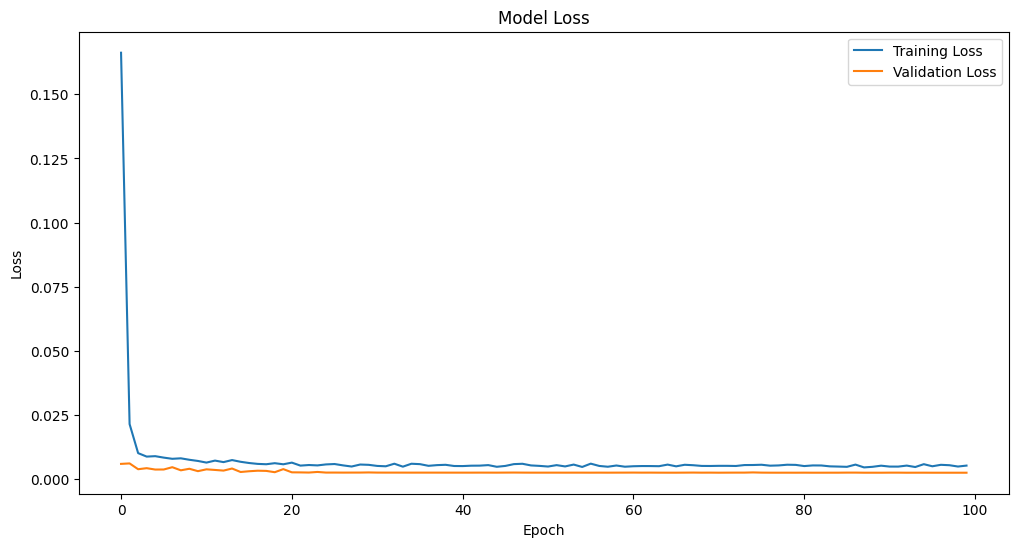

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


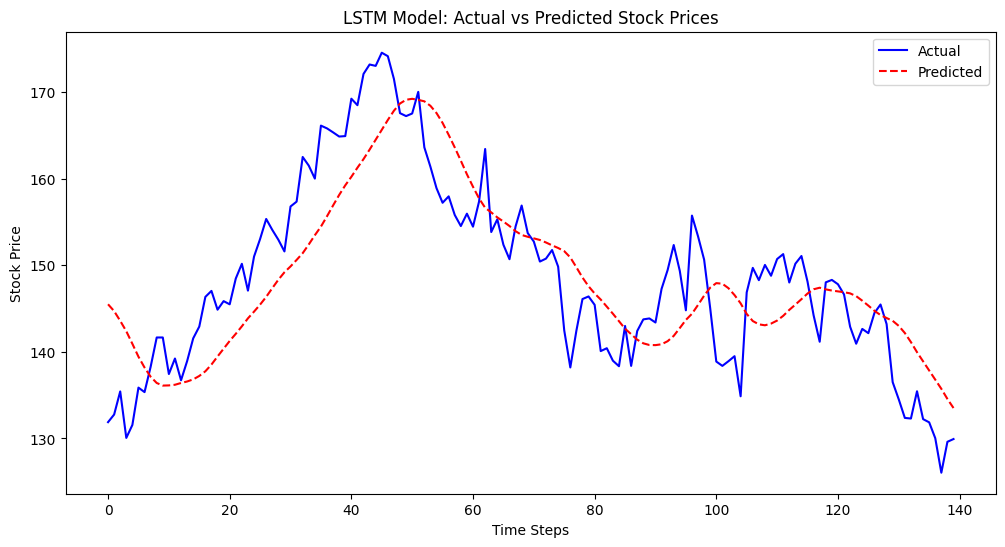


LSTM Model Performance:
Mean Absolute Error (MAE): 5.3825
Root Mean Square Error (RMSE): 6.2946


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def create_lstm_sequences(data, look_back=60):
    """
    Create sequences for LSTM input

    Parameters:
    - data: Normalized price data
    - look_back: Number of previous time steps to use for prediction

    Returns:
    - X (input sequences), Y (target values)
    """
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back)])
        Y.append(data[i + look_back])

    return np.array(X), np.array(Y)

def build_lstm_model(look_back=60, features=1):
    """
    Construct LSTM neural network

    Parameters:
    - look_back: Number of time steps
    - features: Number of input features

    Returns:
    - Compiled Keras LSTM model
    """
    model = Sequential([
        # First LSTM layer with return sequences for deeper network
        LSTM(units=50, return_sequences=True,
             input_shape=(look_back, features),
             activation='relu'),
        Dropout(0.2),

        # Second LSTM layer
        LSTM(units=50, activation='relu'),
        Dropout(0.2),

        # Dense output layer
        Dense(units=1)
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='mean_squared_error')

    return model

def train_lstm_model(X_train, Y_train, X_test, Y_test):
    """
    Train LSTM model with callbacks and validation

    Parameters:
    - X_train, Y_train: Training data
    - X_test, Y_test: Validation data

    Returns:
    - Trained model
    - Training history
    """
    # Create model
    model = build_lstm_model(
        look_back=X_train.shape[1],
        features=X_train.shape[2]
    )

    # Callbacks
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=0.00001
    )

    # Train the model
    history = model.fit(
        X_train, Y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_test, Y_test),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    return model, history

def evaluate_lstm_model(model, X_test, Y_test, scaler):
    """
    Evaluate LSTM model performance

    Parameters:
    - model: Trained LSTM model
    - X_test, Y_test: Test data
    - scaler: MinMaxScaler used for inverse transformation

    Returns:
    - Predictions
    - Performance metrics
    """
    # Predict
    Y_pred = model.predict(X_test)

    # Inverse transform predictions and actual values
    Y_test_inv = scaler.inverse_transform(Y_test.reshape(-1, 1))
    Y_pred_inv = scaler.inverse_transform(Y_pred)

    # Calculate metrics
    mae = mean_absolute_error(Y_test_inv, Y_pred_inv)
    rmse = np.sqrt(mean_squared_error(Y_test_inv, Y_pred_inv))

    # Visualization
    plt.figure(figsize=(12,6))
    plt.plot(Y_test_inv, label='Actual', color='blue')
    plt.plot(Y_pred_inv, label='Predicted', color='red', linestyle='--')
    plt.title('LSTM Model: Actual vs Predicted Stock Prices')
    plt.xlabel('Time Steps')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

    # Print performance metrics
    print("\nLSTM Model Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Square Error (RMSE): {rmse:.4f}")

    return Y_pred_inv, mae, rmse

def plot_training_history(history):
    """
    Visualize training and validation loss

    Parameters:
    - history: Model training history
    """
    plt.figure(figsize=(12,6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

def main_lstm_workflow(close_price):
    """
    Main workflow for LSTM model development

    Parameters:
    - close_price: Closing price time series

    Returns:
    - Trained LSTM model
    - Performance metrics
    """
    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_prices = scaler.fit_transform(close_price.values.reshape(-1, 1))

    # Create sequences
    look_back = 60  # Can be tuned
    X, Y = create_lstm_sequences(scaled_prices, look_back)

    # Split into train and test
    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    Y_train, Y_test = Y[:split], Y[split:]

    # Train the model
    lstm_model, history = train_lstm_model(X_train, Y_train, X_test, Y_test)

    # Plot training history
    plot_training_history(history)

    # Evaluate the model
    predictions, mae, rmse = evaluate_lstm_model(
        lstm_model, X_test, Y_test, scaler
    )

    return lstm_model, (mae, rmse)

# Example usage in main script
if __name__ == "__main__":
    # Assuming previous preprocessing steps
    aapl = download_stock_data()
    preprocessed_aapl = main_preprocessing(aapl)

    # Select close price
    close_price = preprocessed_aapl['Close', 'AAPL']

    # Perform LSTM analysis
    lstm_model, (mae, rmse) = main_lstm_workflow(close_price)

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, pre

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


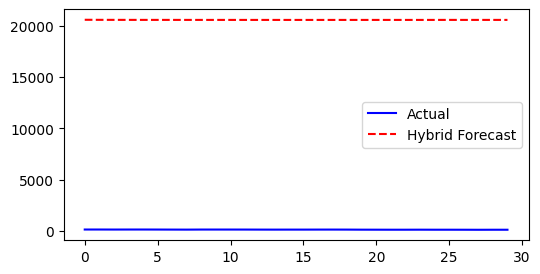

ARIMA - MAE: 11.3702, RMSE: 13.4392
LSTM  - MAE: 137.8055, RMSE: 138.0136
Hybrid- MAE: 20423.7395, RMSE: 20423.7407


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

class AdvancedStockForecaster:
    def __init__(self, ticker='AAPL', start='2020-01-01', end='2022-12-31'):
        """
        Initialize the advanced stock forecasting workflow
        """
        # Download and preprocess data
        self.stock_data = self.download_and_preprocess(ticker, start, end)
        self.close_price = self.stock_data['Close'].values.flatten()
        self.scaler = MinMaxScaler(feature_range=(0, 1))
        self.scaled_prices = self.scaler.fit_transform(
            self.close_price.reshape(-1, 1)
        ).flatten()

    def download_and_preprocess(self, ticker, start, end):
        """
        Download and preprocess stock data
        """
        stock_data = yf.download(ticker, start=start, end=end)
        return stock_data.ffill().bfill()

    def train_arima_model(self):
        """
        Train ARIMA model and extract residuals
        """
        close_series = pd.Series(
            self.close_price,
            index=self.stock_data.index
        )
        arima_model = ARIMA(close_series, order=(1, 1, 1))
        arima_fit = arima_model.fit()
        arima_residuals = arima_fit.resid
        return arima_fit, arima_residuals

    def train_lstm_model(self, look_back=60, arima_residuals=None):
        """
        Train LSTM model
        """
        def create_sequences(data, look_back=60):
            X, Y = [], []
            for i in range(len(data) - look_back):
                X.append(data[i:(i + look_back)])
                Y.append(data[i + look_back])
            return np.array(X), np.array(Y)

        input_data = arima_residuals.to_numpy() if arima_residuals is not None else self.scaled_prices
        X, Y = create_sequences(input_data)
        X_train, X_test = X[:int(len(X)*0.8)], X[int(len(X)*0.8):]
        Y_train, Y_test = Y[:int(len(Y)*0.8)], Y[int(len(Y)*0.8):]
        X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
        X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

        model = Sequential([
            LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
            Dropout(0.2),
            LSTM(50),
            Dropout(0.2),
            Dense(1)
        ])
        model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
        model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=0)
        return model

    def weighted_hybrid_forecast(self, arima_model, lstm_model, arima_residuals):
        """
        Advanced hybrid forecasting with weighted combination
        """
        arima_forecast = arima_model.forecast(steps=30).to_numpy()
        lstm_forecast = []
        input_sequence = arima_residuals.to_numpy()[-60:].reshape(1, 60, 1)
        for _ in range(len(arima_forecast)):
            prediction = lstm_model.predict(input_sequence)[0, 0]
            lstm_forecast.append(prediction)
            input_sequence = np.roll(input_sequence, -1, axis=1)
            input_sequence[0, -1, 0] = prediction
        lstm_forecast = np.array(lstm_forecast)
        arima_scaled = self.scaler.transform(arima_forecast.reshape(-1, 1)).flatten()
        lstm_scaled = self.scaler.transform(lstm_forecast.reshape(-1, 1)).flatten()
        X = np.column_stack([arima_scaled, lstm_scaled])
        y = self.scaled_prices[-len(arima_scaled):]
        reg = LinearRegression().fit(X, y)
        weights = reg.coef_
        hybrid_forecast = (
            weights[0] * self.scaler.inverse_transform(arima_scaled.reshape(-1, 1)).flatten() +
            weights[1] * self.scaler.inverse_transform(lstm_scaled.reshape(-1, 1)).flatten()
        )
        return hybrid_forecast, weights

    def evaluate_models(self, arima_forecast, lstm_forecast, hybrid_forecast, actual):
        """
        Evaluate models
        """
        def calculate_metrics(forecast, actual):
            mae = mean_absolute_error(actual, forecast)
            rmse = np.sqrt(mean_squared_error(actual, forecast))
            return mae, rmse

        min_length = min(len(arima_forecast), len(lstm_forecast), len(hybrid_forecast), len(actual))
        arima_forecast = arima_forecast[:min_length]
        lstm_forecast = lstm_forecast[:min_length]
        hybrid_forecast = hybrid_forecast[:min_length]
        actual = actual[:min_length]

        arima_mae, arima_rmse = calculate_metrics(arima_forecast, actual)
        lstm_mae, lstm_rmse = calculate_metrics(lstm_forecast, actual)
        hybrid_mae, hybrid_rmse = calculate_metrics(hybrid_forecast, actual)

        plt.figure(figsize=(6,3))
        plt.plot(actual, label='Actual', color='blue')
        plt.plot(hybrid_forecast, label='Hybrid Forecast', color='red', linestyle='--')
        plt.legend()
        plt.show()

        print("ARIMA - MAE: {:.4f}, RMSE: {:.4f}".format(arima_mae, arima_rmse))
        print("LSTM  - MAE: {:.4f}, RMSE: {:.4f}".format(lstm_mae, lstm_rmse))
        print("Hybrid- MAE: {:.4f}, RMSE: {:.4f}".format(hybrid_mae, hybrid_rmse))
        return {
            'arima': (arima_mae, arima_rmse),
            'lstm': (lstm_mae, lstm_rmse),
            'hybrid': (hybrid_mae, hybrid_rmse)
        }

    def run_workflow(self):
        """
        Execute the full workflow
        """
        arima_model, arima_residuals = self.train_arima_model()
        lstm_model = self.train_lstm_model(arima_residuals=arima_residuals)
        hybrid_forecast, weights = self.weighted_hybrid_forecast(
            arima_model, lstm_model, arima_residuals
        )
        actual_values = self.close_price[-len(hybrid_forecast):]
        performance = self.evaluate_models(
            arima_model.forecast(steps=30).to_numpy(),
            np.array([lstm_model.predict(arima_residuals.to_numpy()[-60:].reshape(1, 60, 1))[0, 0]] * 30),
            hybrid_forecast,
            actual_values
        )
        return {
            'arima_model': arima_model,
            'lstm_model': lstm_model,
            'hybrid_forecast': hybrid_forecast,
            'weights': weights,
            'performance': performance
        }

# Main execution
if __name__ == "__main__":
    forecaster = AdvancedStockForecaster()
    results = forecaster.run_workflow()
